In [3]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('D:\Program03\数据处理\综合实习\任务1.1-Python数据处理基础(1)\day03\data\data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Arabic.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Chinese.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Czech.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Dutch.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\English.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\French.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\German.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Greek.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Irish.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Italian.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Japanese.txt', 'D:\\Program03\\数据处

KeyError: 'Italian'

In [5]:
from io import open
import glob
import os
import unicodedata
import string

# Define the function to find files using glob
def findFiles(path):
    return glob.glob(path)

# Print the files found in the given path
data_path = r'D:\Program03\数据处理\综合实习\任务1.1-Python数据处理基础(1)\day03\data\data/names/*.txt'
print(findFiles(data_path))

# Define a function to convert Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Initialize the category_lines dictionary and all_categories list
category_lines = {}
all_categories = []

# Define a function to read lines from a file
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# Read files and build the category_lines dictionary
for filename in findFiles(data_path):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

# Get the number of categories
n_categories = len(all_categories)

# Print the categories to check if 'Italian' is loaded
print(all_categories)

# Try to print the first 5 names in the 'Italian' category
if 'Italian' in category_lines:
    print(category_lines['Italian'][:5])
else:
    print('Italian category not found')


['D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Arabic.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Chinese.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Czech.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Dutch.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\English.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\French.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\German.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Greek.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Irish.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Italian.txt', 'D:\\Program03\\数据处理\\综合实习\\任务1.1-Python数据处理基础(1)\\day03\\data\\data/names\\Japanese.txt', 'D:\\Program03\\数据处

In [6]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [7]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [8]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [9]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9539, -2.8407, -2.8861, -2.8987, -2.8017, -2.8768, -2.8840, -2.8140,
         -2.9577, -2.9785, -2.8806, -2.8596, -2.7244, -2.9734, -3.0131, -2.9583,
         -2.9367, -2.8354]], grad_fn=<LogSoftmaxBackward0>)


In [10]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Polish', 12)


In [11]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = English / line = Hamer
category = Greek / line = Telis
category = Russian / line = Averkov
category = German / line = Metz
category = Korean / line = Park 
category = Arabic / line = Sayegh
category = Vietnamese / line = Mach
category = Japanese / line = Iwahashi
category = Russian / line = Shalnikov
category = French / line = Lane


In [12]:
criterion = nn.NLLLoss()

In [13]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [14]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 6s) 1.0685 Munkata / Japanese ✓
10000 10% (0m 11s) 1.7447 Niemczyk / Czech ✗ (Polish)
15000 15% (0m 17s) 2.2847 Sugase / French ✗ (Japanese)
20000 20% (0m 23s) 2.1647 Amador / French ✗ (Spanish)
25000 25% (0m 28s) 0.8185 Nguyen / Vietnamese ✓
30000 30% (0m 34s) 2.8616 Hsiao / Portuguese ✗ (Chinese)
35000 35% (0m 39s) 0.0685 Zdunowski / Polish ✓
40000 40% (0m 45s) 0.1674 Mustafa / Arabic ✓
45000 45% (0m 50s) 0.7358 Ricchetti / Italian ✓
50000 50% (0m 56s) 1.6370 Wildman / Dutch ✗ (English)
55000 55% (1m 2s) 0.0305 Thach / Vietnamese ✓
60000 60% (1m 7s) 0.2276 Notoriano / Italian ✓
65000 65% (1m 13s) 2.8005 Dounias / French ✗ (Greek)
70000 70% (1m 18s) 1.8675 Tailler / Scottish ✗ (French)
75000 75% (1m 24s) 1.2030 Duncan / Irish ✗ (Scottish)
80000 80% (1m 29s) 1.3411 Wood / Scottish ✓
85000 85% (1m 35s) 1.7051 Salzwedel / Czech ✗ (German)
90000 90% (1m 40s) 0.1122 Rooiakkers / Dutch ✓
95000 95% (1m 46s) 0.4181 Kaufer / German ✓
100000 100% (1m 52s) 0.3124 Krol / Polish ✓


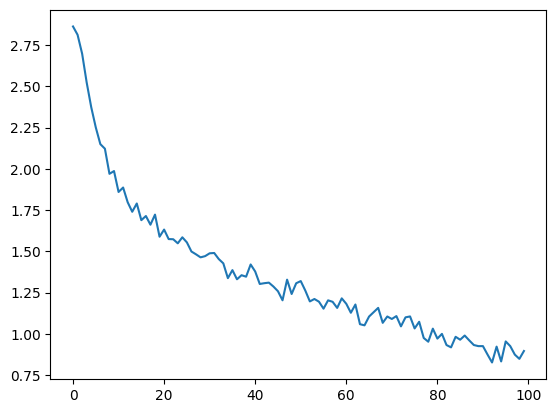

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

C:\Users\20887\AppData\Local\Temp\ipykernel_24248\3585656379.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
C:\Users\20887\AppData\Local\Temp\ipykernel_24248\3585656379.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


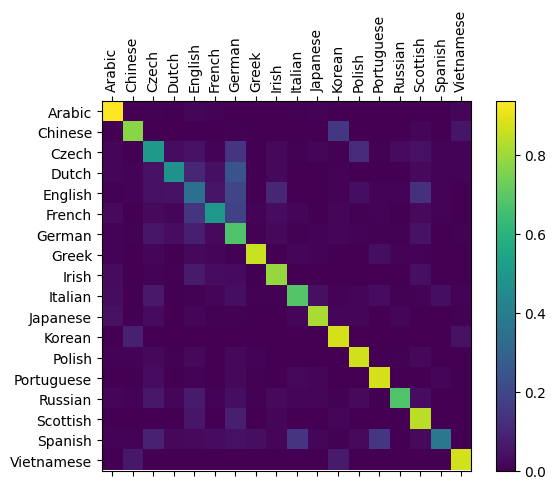

In [16]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [17]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.12) English
(-1.17) Russian
(-1.28) Czech

> Jackson
(-0.05) Scottish
(-3.05) English
(-7.09) Russian

> Satoshi
(-0.06) Japanese
(-3.91) Arabic
(-4.17) Italian


5000 5% (0m 6s) 1.9729 Paredes / Portuguese ✓
10000 10% (0m 12s) 2.6508 Lawn / Irish ✗ (English)
15000 15% (0m 17s) 0.9241 Zolotarevsky / Russian ✓
20000 20% (0m 23s) 4.7196 Kool / Scottish ✗ (Dutch)
25000 25% (0m 29s) 0.8538 Janov / Korean ✗ (Russian)
30000 30% (0m 34s) 0.1013 Tassioglou / Greek ✓
35000 35% (0m 40s) 1.2779 Rong / Korean ✗ (Chinese)
40000 40% (0m 46s) 1.7515 Plourde / Portuguese ✗ (French)
45000 45% (0m 51s) 1.3472 Sung / Chinese ✗ (Korean)
50000 50% (0m 57s) 1.9224 Kriz / Polish ✗ (Czech)
55000 55% (1m 3s) 2.8787 Hautem / Portuguese ✗ (Dutch)
60000 60% (1m 8s) 2.0558 Del bosque / French ✗ (Spanish)
65000 65% (1m 14s) 0.3531 Rui / Chinese ✓
70000 70% (1m 19s) 1.8285 Mencher / German ✗ (Polish)
75000 75% (1m 25s) 0.8314 Blanco / Italian ✗ (Spanish)
80000 80% (1m 30s) 0.0160 Paradjanov / Russian ✓
85000 85% (1m 36s) 0.0950 Phung / Vietnamese ✓
90000 90% (1m 42s) 0.0950 Ferreiro / Portuguese ✓
95000 95% (1m 47s) 5.3586 Trudu / English ✗ (Italian)
100000 100% (1m 53s) 3.18

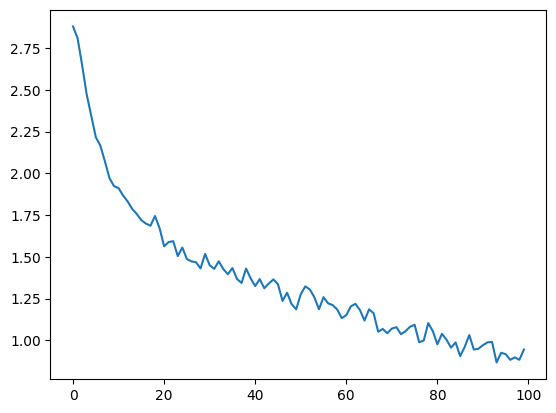

C:\Users\20887\AppData\Local\Temp\ipykernel_32088\3811594743.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
C:\Users\20887\AppData\Local\Temp\ipykernel_32088\3811594743.py:156: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


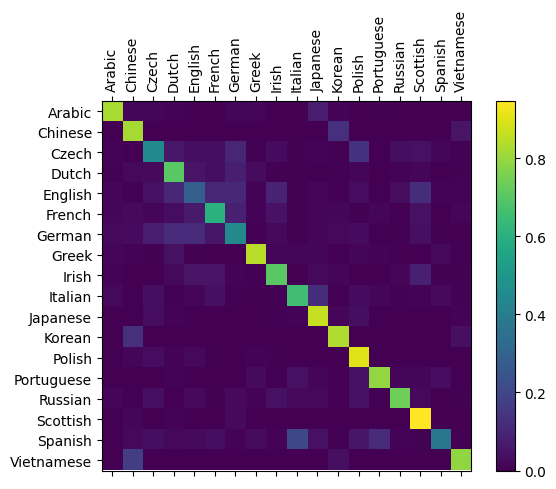


> Dovesky
(-0.23) Russian
(-2.12) Czech
(-3.00) English

> Jackson
(-0.04) Scottish
(-3.47) English
(-6.81) Polish

> Satoshi
(-0.06) Japanese
(-3.05) Polish
(-5.18) Italian


In [1]:
import glob
import os
import unicodedata
import string
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
import math

# 找到文件
def findFiles(path): return glob.glob(path)

# Unicode转换为ASCII
def unicodeToAscii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn'
                   and c in all_letters)

# 读取文件并转换为ASCII
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# 字母和行的Tensor转换
def letterToIndex(letter): return all_letters.find(letter)
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

# 构建分类词典
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
category_lines = {}
all_categories = []
data_path = r'D:\Program03\数据处理\综合实习\任务1.1-Python数据处理基础(1)\day03\data\data/names/*.txt'
for filename in findFiles(data_path):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
n_categories = len(all_categories)

# 定义RNN
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

# 训练
criterion = nn.NLLLoss()
learning_rate = 0.005
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    loss = criterion(output, category_tensor)
    loss.backward()
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
    return output, loss.item()

# 评估
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    return output

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

# 随机选择训练样本
def randomChoice(l): return l[random.randint(0, len(l) - 1)]
def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

# 训练循环
n_iters = 100000
print_every = 5000
plot_every = 1000
current_loss = 0
all_losses = []
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)
start = time.time()
for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

# 绘制损失
plt.figure()
plt.plot(all_losses)
plt.show()

# 混淆矩阵
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

# 预测
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []
        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')
